In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Variables:
    
- Sex: Sex of the patient
- Age: Age of the patient
- Arrival mode: Type of transportation to the hospital
- Injury: Whether the patient is injured or not
- Chief_complain: The patient's complaint
- Mental: The mental state of the patient
- Pain: Whether the patient has pain
- NRS_pain: Nurse's assessment of pain for the patient. Zero represents usually no pain whereas upper limit represents worst pain
- SBP: Systolic Blood Pressure.
- DBP: Diastolic Blood Pressure.
- Saturation: Oxygen Saturation refers to percentage of oxygen in patient's blood.
- HR: Heat Rate.
- RR: Respiratory rate
- BT: Body Temperature

The technical document in the project of the data set has been reached. It was seen in this document that some numerical data were actually categorical. These values are as follows.

Reason Visit : Injury [1 = No, 2= Yes]

Gender : Sex [1 = Famale, 2 = Male]

Pain : Pain [1 = Yes, 0 = No]

Menatal : Mental [1 = Alert, 2 = Verbol Response, 3 = Pain Response, 4 = Unresponse]

Type of ED : Group [1 = Local ED 3th Degree, 2 = Regional ED 4tg Degree]

Mode of Arrival : Arrival Mode [1 = Walking, 2 = Public Ambulance, 3 = Private Vehicle, 4 = Private Ambulance, 5,6,7 = Other]

Disposition : Disposition [1 = Dischange, 2 = Admission to ward, 3 = Admission to ICU, 4 = Disharge, 5 = Transfer, 6 = Death, 7 = Surgery]

KTAS : KTAS… [1,2,3 = Emergency, 4,5 = Non-Emergency]

Triage_level : Triage_level [0-Immediate, 1-Urgent, 2-Non-urgent]

In [89]:
df = pd.read_csv('data_1.csv')
df.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,triage_level
0,2,2,71,3,3,2,right ocular pain,1,1,2.0,...,36.6,100,2,Corneal abrasion,1,4,2,86,"5,00",1
1,1,1,56,12,3,2,right forearm burn,1,1,2.0,...,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64,"3,95",1
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2.0,...,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862,"1,00",1
3,1,2,71,8,1,1,ascites tapping,1,1,3.0,...,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,1,5,6,108,"9,83",1
4,1,2,58,4,3,1,"distension, abd",1,1,3.0,...,36.5,NaN,4,Ascites,1,5,8,109,"6,60",1


In [90]:
df.shape

(1267, 24)

In [91]:
df.columns

Index(['Group', 'Sex', 'Age', 'Patients number per hour', 'Arrival mode',
       'Injury', 'Chief_complain', 'Mental', 'Pain', 'NRS_pain', 'SBP', 'DBP',
       'HR', 'RR', 'BT', 'Saturation', 'KTAS_RN', 'Diagnosis in ED',
       'Disposition', 'KTAS_expert', 'Error_group', 'Length of stay_min',
       'KTAS duration_min', 'triage_level'],
      dtype='object')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Group                     1267 non-null   int64  
 1   Sex                       1267 non-null   int64  
 2   Age                       1267 non-null   int64  
 3   Patients number per hour  1267 non-null   int64  
 4   Arrival mode              1267 non-null   int64  
 5   Injury                    1267 non-null   int64  
 6   Chief_complain            1267 non-null   object 
 7   Mental                    1267 non-null   int64  
 8   Pain                      1267 non-null   int64  
 9   NRS_pain                  711 non-null    float64
 10  SBP                       1267 non-null   object 
 11  DBP                       1267 non-null   object 
 12  HR                        1267 non-null   object 
 13  RR                        1267 non-null   object 
 14  BT      

In [93]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Group,1267.0,1.456985,0.498343,1.0,1.0,1.0,2.0,2.0
Sex,1267.0,1.521705,0.499726,1.0,1.0,2.0,2.0,2.0
Age,1267.0,54.423836,19.725033,16.0,37.0,57.0,71.0,96.0
Patients number per hour,1267.0,7.519337,3.160563,1.0,5.0,7.0,10.0,17.0
Arrival mode,1267.0,2.820837,0.807904,1.0,2.0,3.0,3.0,7.0
Injury,1267.0,1.192581,0.394482,1.0,1.0,1.0,1.0,2.0
Mental,1267.0,1.105762,0.447768,1.0,1.0,1.0,1.0,4.0
Pain,1267.0,0.563536,0.496143,0.0,0.0,1.0,1.0,1.0
NRS_pain,711.0,4.104079,1.419332,1.0,3.0,4.0,5.0,10.0
KTAS_RN,1267.0,3.335438,0.885391,1.0,3.0,3.0,4.0,5.0


# Missing Value Analysis

In [94]:
df.isnull().sum().any()

True

In [95]:
df.isnull().sum()

Group                         0
Sex                           0
Age                           0
Patients number per hour      0
Arrival mode                  0
Injury                        0
Chief_complain                0
Mental                        0
Pain                          0
NRS_pain                    556
SBP                           0
DBP                           0
HR                            0
RR                            0
BT                            0
Saturation                  688
KTAS_RN                       0
Diagnosis in ED               5
Disposition                   0
KTAS_expert                   0
Error_group                   0
Length of stay_min            0
KTAS duration_min             0
triage_level                  0
dtype: int64

<AxesSubplot:>

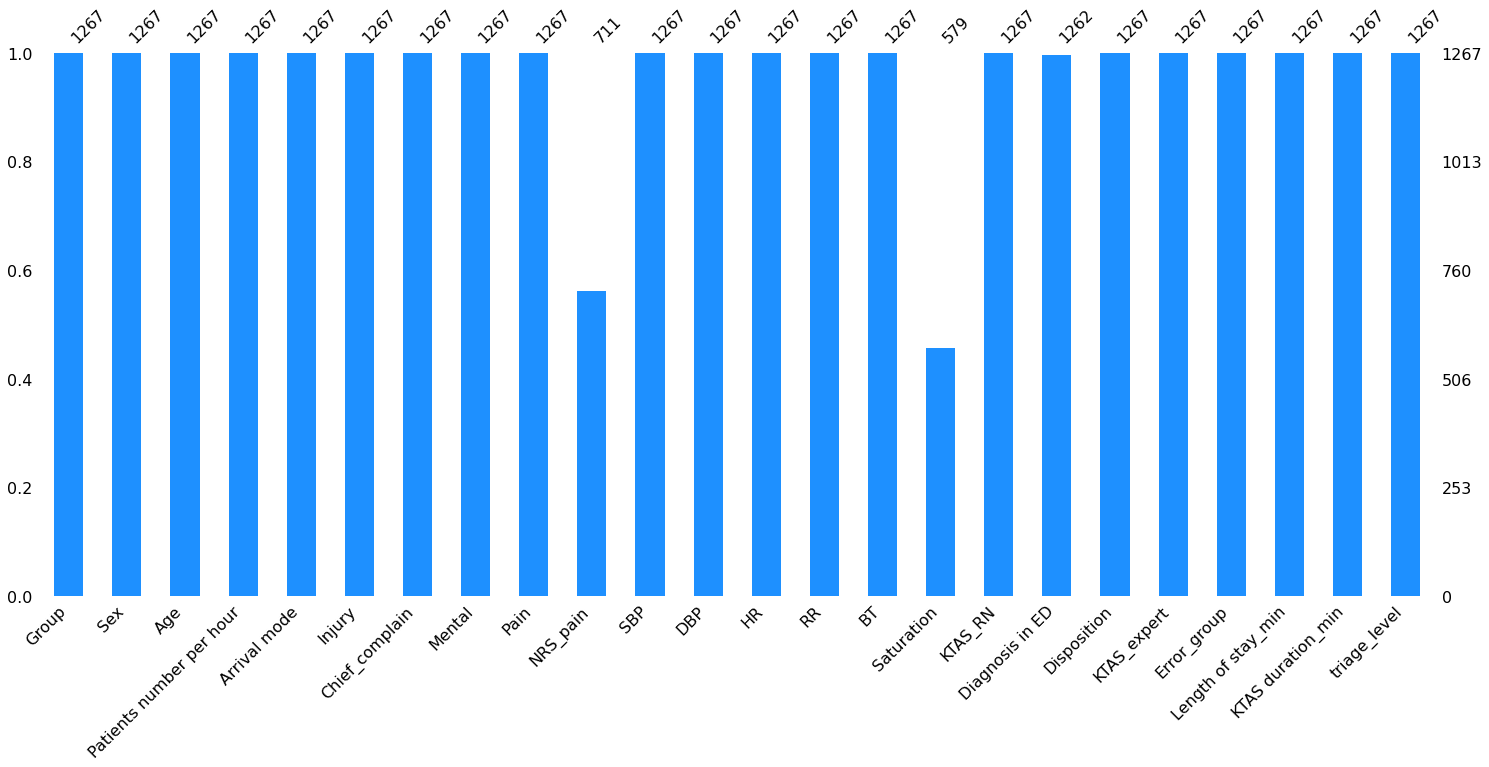

In [96]:
import missingno as msno
msno.bar(df, color='dodgerblue')

In [97]:
df['Saturation'].value_counts()

Saturation
98     228
99     109
97      91
96      48
95      25
100     22
94      15
??       9
90       6
93       6
92       5
91       3
88       2
86       2
68       1
89       1
78       1
76       1
85       1
80       1
20       1
74       1
Name: count, dtype: int64

In [98]:
df["Saturation"] = df.groupby(["triage_level", "KTAS_expert"])["Saturation"].transform(lambda x: x.fillna(x.mode()[0]))

In [99]:
df["Diagnosis in ED"] = df.groupby(["triage_level", "KTAS_expert"])["Diagnosis in ED"].transform(lambda x: x.fillna(x.mode()[0]))

In [100]:
df.isnull().sum()

Group                         0
Sex                           0
Age                           0
Patients number per hour      0
Arrival mode                  0
Injury                        0
Chief_complain                0
Mental                        0
Pain                          0
NRS_pain                    556
SBP                           0
DBP                           0
HR                            0
RR                            0
BT                            0
Saturation                    0
KTAS_RN                       0
Diagnosis in ED               0
Disposition                   0
KTAS_expert                   0
Error_group                   0
Length of stay_min            0
KTAS duration_min             0
triage_level                  0
dtype: int64

In [101]:
sat_mode = df['Saturation'].mode()

In [102]:
sat_mode

0    98
Name: Saturation, dtype: object

<AxesSubplot:>

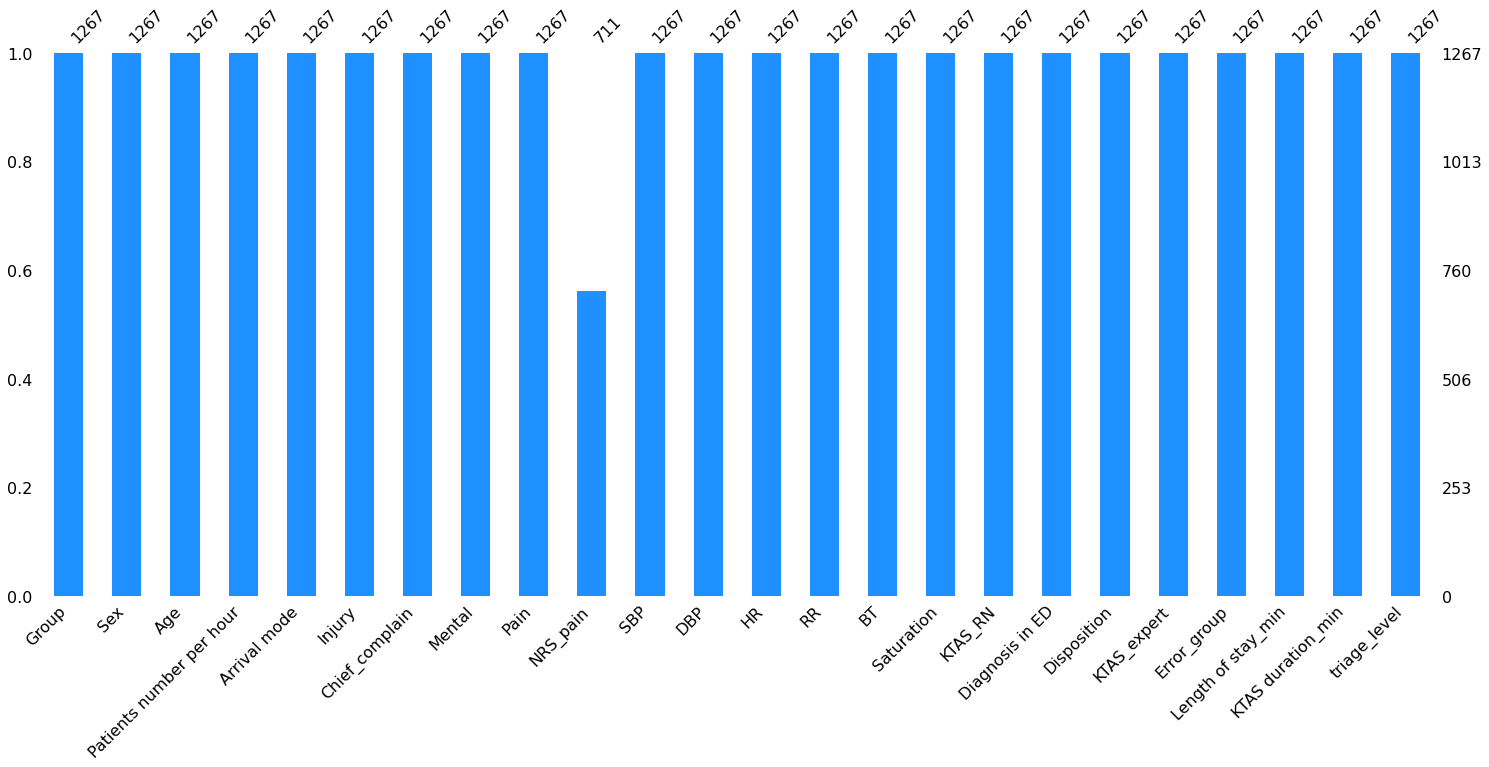

In [103]:
msno.bar(df, color="dodgerblue")

# Feature Engineering

In [104]:
injury_cateogry = ['No','Yes']
sex_cateogry = ['Female','Male']
pain_cateogry = ['No','Yes']
mental_cateogry = ['Alert','Verbose Response','Pain Response','Unresponsive']
group_category = ['Local ED (3th Degree)', 'Regional ED (4th Degree)']
arrival_mode_category = ['Walking','Public Ambulance', 'Private Vehicle','Private Ambulance', 'Other','Other','Other']
disposition_category = ['Discharge', 'Admission to Ward', 'Admission to ICU', 'Discharge', 'Transfer', 'Death', 'Surgery']
KTAS_category = ['Emergency','Emergency','Emergency', 'Non-Emergency', 'Non-Emergency']
mistriage_category = ['Immediate','Urgent','Non-urgent']

In [105]:
df['KTAS duration_min'].value_counts()

KTAS duration_min
2,00     173
4,00     156
3,00     150
5,00      74
1,00      37
        ... 
13,15      1
5,88       1
11,47      1
13,00      1
11,42      1
Name: count, Length: 392, dtype: int64

In [106]:
df['KTAS duration_min'] = df['KTAS duration_min'].apply(lambda x: int(float(x.replace(',', '.'))))

In [107]:
df['KTAS duration_min'].value_counts()

KTAS duration_min
4     240
3     217
2     189
5     167
6      98
7      65
8      60
9      45
1      37
10     32
11     32
12     24
13     16
15     13
16     12
14     11
17      9
Name: count, dtype: int64

In [108]:
df['HR']

0        84
1        60
2       102
3        88
4        93
       ... 
1262     86
1263     94
1264     80
1265     78
1266     62
Name: HR, Length: 1267, dtype: object

In [109]:
df.loc[df["Sex"] == 1, "Sex"] = sex_cateogry[0]
df.loc[df["Sex"] == 2, "Sex"] = sex_cateogry[1]

In [110]:
df['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [111]:
df.loc[df["Injury"] == 1, "Injury"] = injury_cateogry[0]
df.loc[df["Injury"] == 2, "Injury"] = injury_cateogry[1]

In [112]:
df['Injury'].unique()

array(['Yes', 'No'], dtype=object)

In [113]:
df.loc[df["Group"] == 1, "Group"] = group_category[0]
df.loc[df["Group"] == 2, "Group"] = group_category[1]

In [114]:
df.loc[df["Pain"] == 0, "Pain"] = pain_cateogry[0]
df.loc[df["Pain"] == 1, "Pain"] = pain_cateogry[1]

In [115]:
df['Pain'].unique()

array(['Yes', 'No'], dtype=object)

In [116]:
df.loc[df["Mental"] == 1, "Mental"] = mental_cateogry[0]
df.loc[df["Mental"] == 2, "Mental"] = mental_cateogry[1]
df.loc[df["Mental"] == 3, "Mental"] = mental_cateogry[2]
df.loc[df["Mental"] == 4, "Mental"] = mental_cateogry[3]

In [117]:
df['Mental'].unique()

array(['Alert', 'Verbose Response', 'Pain Response', 'Unresponsive'],
      dtype=object)

In [118]:
df.loc[df["Arrival mode"] == 1, "Arrival mode"] = arrival_mode_category[0]
df.loc[df["Arrival mode"] == 2, "Arrival mode"] = arrival_mode_category[1]
df.loc[df["Arrival mode"] == 3, "Arrival mode"] = arrival_mode_category[2]
df.loc[df["Arrival mode"] == 4, "Arrival mode"] = arrival_mode_category[3]
df.loc[df["Arrival mode"] == 5, "Arrival mode"] = arrival_mode_category[4]
df.loc[df["Arrival mode"] == 6, "Arrival mode"] = arrival_mode_category[5]
df.loc[df["Arrival mode"] == 7, "Arrival mode"] = arrival_mode_category[6]

In [119]:
df['Arrival mode'].unique()

array(['Private Vehicle', 'Public Ambulance', 'Walking',
       'Private Ambulance', 'Other'], dtype=object)

In [120]:
df.loc[df["Disposition"] == 1, "Disposition"] = disposition_category[0]
df.loc[df["Disposition"] == 2, "Disposition"] = disposition_category[1]
df.loc[df["Disposition"] == 3, "Disposition"] = disposition_category[2]
df.loc[df["Disposition"] == 4, "Disposition"] = disposition_category[3]
df.loc[df["Disposition"] == 5, "Disposition"] = disposition_category[4]
df.loc[df["Disposition"] == 6, "Disposition"] = disposition_category[5]
df.loc[df["Disposition"] == 7, "Disposition"] = disposition_category[6]

In [121]:
df['Disposition'].unique()

array(['Discharge', 'Admission to Ward', 'Transfer', 'Surgery', 'Death',
       'Admission to ICU'], dtype=object)

In [122]:
df.loc[df["KTAS_RN"] == 1, "KTAS_RN"] = KTAS_category[0]
df.loc[df["KTAS_RN"] == 2, "KTAS_RN"] = KTAS_category[1]
df.loc[df["KTAS_RN"] == 3, "KTAS_RN"] = KTAS_category[2]
df.loc[df["KTAS_RN"] == 4, "KTAS_RN"] = KTAS_category[3]
df.loc[df["KTAS_RN"] == 5, "KTAS_RN"] = KTAS_category[4]

In [123]:
df['KTAS_RN'].unique()

array(['Emergency', 'Non-Emergency'], dtype=object)

In [124]:
df.loc[df["KTAS_expert"] == 1, "KTAS_expert"] = KTAS_category[0]
df.loc[df["KTAS_expert"] == 2, "KTAS_expert"] = KTAS_category[1]
df.loc[df["KTAS_expert"] == 3, "KTAS_expert"] = KTAS_category[2]
df.loc[df["KTAS_expert"] == 4, "KTAS_expert"] = KTAS_category[3]
df.loc[df["KTAS_expert"] == 5, "KTAS_expert"] = KTAS_category[4]

In [125]:
df['KTAS_expert'].unique()

array(['Non-Emergency', 'Emergency'], dtype=object)

In [126]:
df.loc[df["triage_level"] == 0, "triage_level"] = mistriage_category[0]
df.loc[df["triage_level"] == 1, "triage_level"] = mistriage_category[1]
df.loc[df["triage_level"] == 2, "triage_level"] = mistriage_category[2]

In [127]:
df['triage_level'].unique()

array(['Urgent', 'Non-urgent', 'Immediate'], dtype=object)

In [128]:
df[["SBP","DBP","HR","RR","BT","Saturation"]] = df[["SBP","DBP","HR","RR","BT","Saturation"]].replace("??",0).astype(str).astype(float)
df['SBP'] = df['SBP'].replace(0,df['SBP'].mode()[0])
df['DBP'] = df['DBP'].replace(0,df['DBP'].mode()[0])

In [129]:
df['HR']

0        84.0
1        60.0
2       102.0
3        88.0
4        93.0
        ...  
1262     86.0
1263     94.0
1264     80.0
1265     78.0
1266     62.0
Name: HR, Length: 1267, dtype: float64

In [130]:
interval = (0, 25, 45, 60, 100)
categories = ['Young', 'Adult', 'Mid_Age', 'Old']
df["New_Age"] = pd.cut(df.Age, interval, labels=categories)

In [131]:
df.loc[df['SBP'] < 80, 'New_SBP'] = 'Low'
df.loc[(df["SBP"] >= 80) & (df["SBP"] <= 120), 'New_SBP'] = 'Normal'
df.loc[df['SBP'] > 120, 'New_SBP'] = 'High'

In [132]:
df.loc[df['DBP'] < 60, 'New_DBP'] = 'Low'
df.loc[(df["DBP"] >= 60) & (df["DBP"] <= 80), 'New_DBP'] = 'Normal'
df.loc[df['DBP'] > 80, 'New_DBP'] = 'High'

In [133]:
df.loc[df['HR'] < 45, 'New_HR'] = 'Low'
df.loc[(df["HR"] >= 45) & (df["HR"] <= 100), 'New_HR'] = 'Normal'
df.loc[df['HR'] > 100, 'New_HR'] = 'High'

In [134]:
df.loc[df['RR'] < 12, 'New_RR'] = 'Low'
df.loc[(df["RR"] >= 12) & (df["RR"] <= 25), 'New_RR'] = 'Normal'
df.loc[df['RR'] > 25, 'New_RR'] = 'High'

In [135]:
df.loc[df['BT'] < 36.4, 'New_BT'] = 'Low'
df.loc[(df['BT'] >= 36.4) & (df['BT'] <= 37.6), 'New_BT'] = 'Normal'
df.loc[df['BT'] > 37.6, 'New_BT'] = 'High'

In [136]:
df.loc[df['NRS_pain'] < 3, 'New_NRS_pain'] = 'Low Pain'
df.loc[(df["NRS_pain"] >= 3) & (df["NRS_pain"] <= 7), 'New_NRS_pain'] = 'Pain'
df.loc[df['NRS_pain'] > 7, 'New_NRS_pain'] = 'High Pain'

In [137]:
df.loc[df['KTAS duration_min'] < 10, 'New_KTAS_duration_min'] = 'Immediate'
df.loc[(df["KTAS duration_min"] >= 10) & (df["KTAS duration_min"] <= 60), 'New_KTAS_duration_min'] = 'Very Urgent'
df.loc[(df["KTAS duration_min"] >= 61) & (df["KTAS duration_min"] <= 120), 'New_KTAS_duration_min'] = 'Urgent'
df.loc[(df["KTAS duration_min"] >= 121) & (df["KTAS duration_min"] <= 240), 'New_KTAS_duration_min'] = 'Standard'
df.loc[df['KTAS duration_min'] > 240, 'New_KTAS_duration_min'] = 'Non-Urgent'

In [138]:
df.loc[df['Length of stay_min'] < 10, 'New_Length_of_stay_min'] = 'Immediate'
df.loc[(df["Length of stay_min"] >= 10) & (df["Length of stay_min"] <= 60), 'New_Length_of_stay_min'] = 'Very Urgent'
df.loc[(df["Length of stay_min"] >= 61) & (df["Length of stay_min"] <= 120), 'New_Length_of_stay_min'] = 'Urgent'
df.loc[(df["Length of stay_min"] >= 121) & (df["Length of stay_min"] <= 240), 'New_Length_of_stay_min'] = 'Standard'
df.loc[df['Length of stay_min'] > 240, 'New_Length_of_stay_min'] = 'Non-Urgent'

In [139]:
df.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,triage_level,New_Age,New_SBP,New_DBP,New_HR,New_RR,New_BT,New_NRS_pain,New_KTAS_duration_min,New_Length_of_stay_min
0,Regional ED (4th Degree),Male,71,3,Private Vehicle,Yes,right ocular pain,Alert,Yes,2.0,...,Urgent,Old,High,High,Normal,Normal,Normal,Low Pain,Immediate,Urgent
1,Local ED (3th Degree),Female,56,12,Private Vehicle,Yes,right forearm burn,Alert,Yes,2.0,...,Urgent,Mid_Age,High,Normal,Normal,Normal,Normal,Low Pain,Immediate,Urgent
2,Regional ED (4th Degree),Female,68,8,Public Ambulance,Yes,"arm pain, Lt",Alert,Yes,2.0,...,Urgent,Old,High,Normal,High,Normal,Normal,Low Pain,Immediate,Non-Urgent
3,Local ED (3th Degree),Male,71,8,Walking,No,ascites tapping,Alert,Yes,3.0,...,Urgent,Old,High,High,Normal,Normal,Normal,Pain,Immediate,Urgent
4,Local ED (3th Degree),Male,58,4,Private Vehicle,No,"distension, abd",Alert,Yes,3.0,...,Urgent,Mid_Age,Normal,Normal,Normal,Normal,Normal,Pain,Immediate,Urgent


# Data Visualization

In [140]:
# fig, ax = plt.subplots(6,2, figsize=(15,25))
# sns.histplot(df['Age'], bins = 20, ax=ax[0,0]) 
# sns.histplot(df['Patients number per hour'], bins = 20, ax=ax[0,1]) 
# sns.histplot(df['SBP'], bins = 20, ax=ax[1,0]) 
# sns.histplot(df['DBP'], bins = 20, ax=ax[1,1]) 
# sns.histplot(df['HR'], bins = 20, ax=ax[2,0])
# sns.histplot(df['RR'], bins = 20, ax=ax[2,1])
# sns.histplot(df['BT'], bins = 20, ax=ax[3,0]) 
# sns.histplot(df['Saturation'], bins = 20, ax=ax[3,1]) 
# sns.histplot(df['Error_group'], bins = 20, ax=ax[4,0])
# sns.histplot(df['Length of stay_min'], bins = 20, ax=ax[4,1]) 
# sns.histplot(df['KTAS duration_min'], bins = 20, ax=ax[5,0])

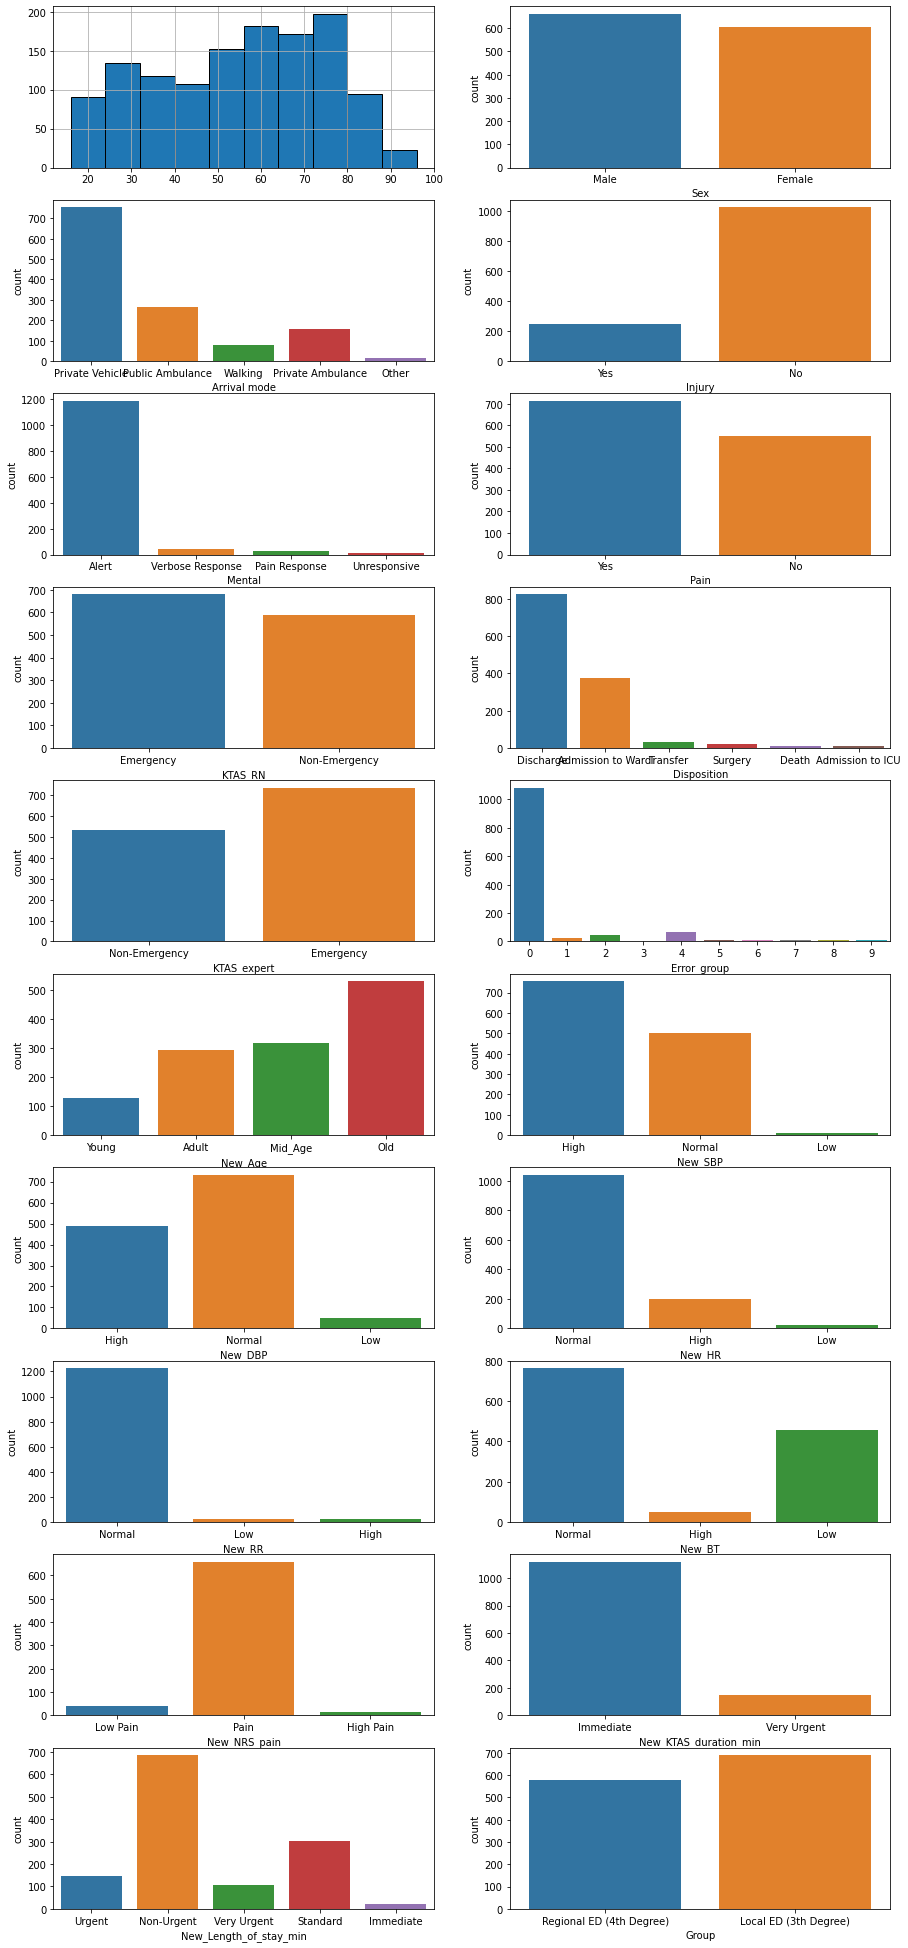

In [141]:
fig, ax = plt.subplots(10,2, figsize=(15,35))
df["Age"].hist(edgecolor = "black", ax=ax[0,0]);
sns.countplot(x='Sex',data=df, ax=ax[0,1]);
sns.countplot(x='Arrival mode',data=df, ax=ax[1,0]);
sns.countplot(x='Injury',data=df, ax=ax[1,1]);
sns.countplot(x='Mental',data=df, ax=ax[2,0]);
sns.countplot(x='Pain',data=df, ax=ax[2,1]);
sns.countplot(x='KTAS_RN',data=df, ax=ax[3,0]);
sns.countplot(x='Disposition',data=df, ax=ax[3,1]);
sns.countplot(x='KTAS_expert',data=df, ax=ax[4,0]);
sns.countplot(x='Error_group',data=df, ax=ax[4,1]);
sns.countplot(x='New_Age',data=df, ax=ax[5,0]);
sns.countplot(x='New_SBP',data=df, ax=ax[5,1]);
sns.countplot(x='New_DBP',data=df, ax=ax[6,0]);
sns.countplot(x='New_HR',data=df, ax=ax[6,1]);
sns.countplot(x='New_RR',data=df, ax=ax[7,0]);
sns.countplot(x='New_BT',data=df, ax=ax[7,1]);
sns.countplot(x='New_NRS_pain',data=df, ax=ax[8,0]);
sns.countplot(x='New_KTAS_duration_min',data=df, ax=ax[8,1]);
sns.countplot(x='New_Length_of_stay_min',data=df, ax=ax[9,0]);
sns.countplot(x='Group',data=df, ax=ax[9,1]);

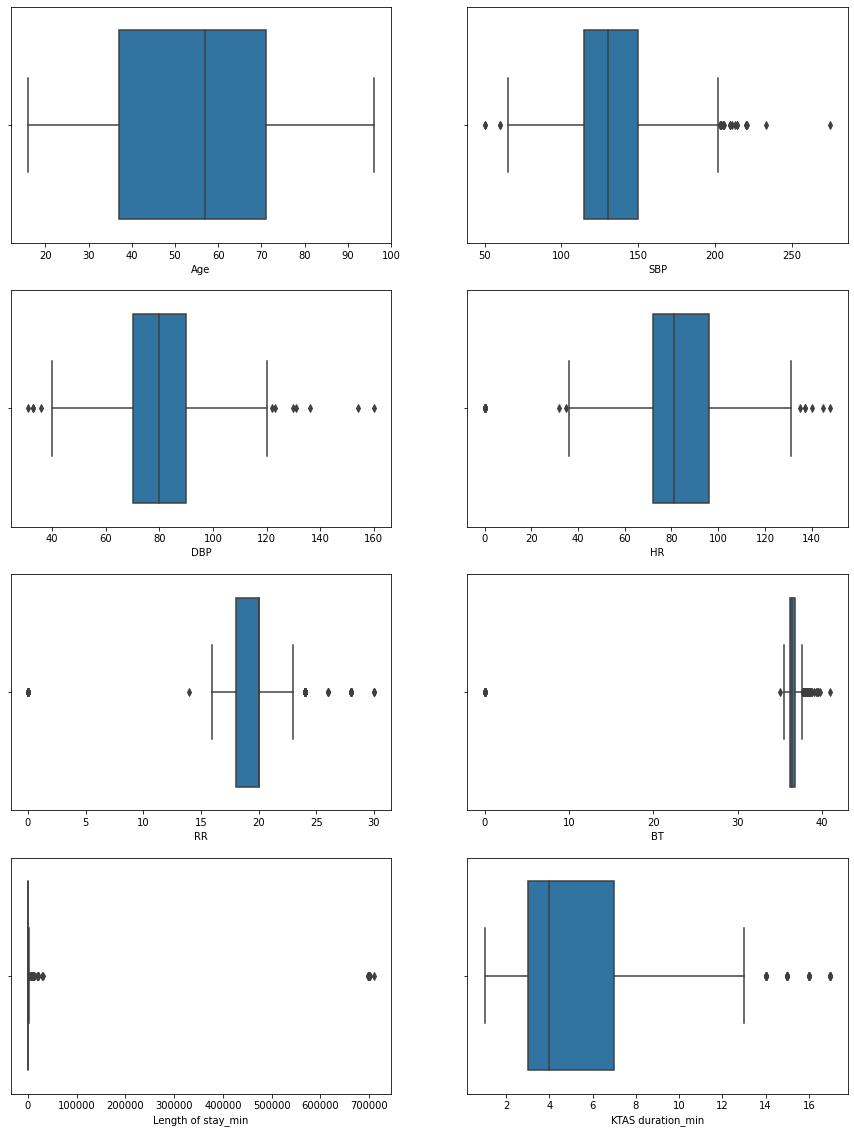

In [142]:
fig, ax = plt.subplots(4,2, figsize=(15,20))
sns.boxplot(x=df["Age"], ax=ax[0,0]);
sns.boxplot(x=df["SBP"], ax=ax[0,1]);
sns.boxplot(x=df["DBP"], ax=ax[1,0]);
sns.boxplot(x=df["HR"], ax=ax[1,1]);
sns.boxplot(x=df["RR"], ax=ax[2,0]);
sns.boxplot(x=df["BT"], ax=ax[2,1]);
sns.boxplot(x=df["Length of stay_min"], ax=ax[3,0]);
sns.boxplot(x=df["KTAS duration_min"], ax=ax[3,1]);

In [143]:
# plt.figure(figsize=(18,12), dpi=200)
# sns.heatmap(df.corr(), annot=True)

In [144]:
df['HR'].value_counts()

HR
80.0     95
100.0    50
78.0     45
74.0     42
76.0     41
         ..
140.0     1
36.0      1
148.0     1
45.0      1
124.0     1
Name: count, Length: 94, dtype: int64

In [145]:
df.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,triage_level,New_Age,New_SBP,New_DBP,New_HR,New_RR,New_BT,New_NRS_pain,New_KTAS_duration_min,New_Length_of_stay_min
0,Regional ED (4th Degree),Male,71,3,Private Vehicle,Yes,right ocular pain,Alert,Yes,2.0,...,Urgent,Old,High,High,Normal,Normal,Normal,Low Pain,Immediate,Urgent
1,Local ED (3th Degree),Female,56,12,Private Vehicle,Yes,right forearm burn,Alert,Yes,2.0,...,Urgent,Mid_Age,High,Normal,Normal,Normal,Normal,Low Pain,Immediate,Urgent
2,Regional ED (4th Degree),Female,68,8,Public Ambulance,Yes,"arm pain, Lt",Alert,Yes,2.0,...,Urgent,Old,High,Normal,High,Normal,Normal,Low Pain,Immediate,Non-Urgent
3,Local ED (3th Degree),Male,71,8,Walking,No,ascites tapping,Alert,Yes,3.0,...,Urgent,Old,High,High,Normal,Normal,Normal,Pain,Immediate,Urgent
4,Local ED (3th Degree),Male,58,4,Private Vehicle,No,"distension, abd",Alert,Yes,3.0,...,Urgent,Mid_Age,Normal,Normal,Normal,Normal,Normal,Pain,Immediate,Urgent


In [146]:
df.columns

Index(['Group', 'Sex', 'Age', 'Patients number per hour', 'Arrival mode',
       'Injury', 'Chief_complain', 'Mental', 'Pain', 'NRS_pain', 'SBP', 'DBP',
       'HR', 'RR', 'BT', 'Saturation', 'KTAS_RN', 'Diagnosis in ED',
       'Disposition', 'KTAS_expert', 'Error_group', 'Length of stay_min',
       'KTAS duration_min', 'triage_level', 'New_Age', 'New_SBP', 'New_DBP',
       'New_HR', 'New_RR', 'New_BT', 'New_NRS_pain', 'New_KTAS_duration_min',
       'New_Length_of_stay_min'],
      dtype='object')

In [147]:
new_df = df[["Injury", "Saturation",
"triage_level", "New_Age", "New_SBP", "New_DBP", "New_HR",
"New_RR", "New_BT"]]

In [148]:
# new_df.head()

In [149]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Injury        1267 non-null   object  
 1   Saturation    1267 non-null   float64 
 2   triage_level  1267 non-null   object  
 3   New_Age       1267 non-null   category
 4   New_SBP       1267 non-null   object  
 5   New_DBP       1267 non-null   object  
 6   New_HR        1267 non-null   object  
 7   New_RR        1267 non-null   object  
 8   New_BT        1267 non-null   object  
dtypes: category(1), float64(1), object(7)
memory usage: 80.7+ KB


In [150]:
new_df.columns

Index(['Injury', 'Saturation', 'triage_level', 'New_Age', 'New_SBP', 'New_DBP',
       'New_HR', 'New_RR', 'New_BT'],
      dtype='object')

# One-Hot encoding using pandas

In [151]:
new_df = pd.get_dummies(new_df, columns=['New_Age', 'New_SBP', 'New_DBP', 'New_HR', 'New_RR', 'New_BT'], drop_first=True)

In [152]:
new_df

,Injury,Saturation,triage_level,New_Age_Adult,New_Age_Mid_Age,New_Age_Old,New_SBP_Low,New_SBP_Normal,New_DBP_Low,New_DBP_Normal,New_HR_Low,New_HR_Normal,New_RR_Low,New_RR_Normal,New_BT_Low,New_BT_Normal
0,Yes,100.0,Urgent,False,False,True,False,False,False,False,False,True,False,True,False,True
1,Yes,98.0,Urgent,False,True,False,False,False,False,True,False,True,False,True,False,True
2,Yes,98.0,Urgent,False,False,True,False,False,False,True,False,False,False,True,False,True
3,No,98.0,Urgent,False,False,True,False,False,False,False,False,True,False,True,False,True
4,No,98.0,Urgent,False,True,False,False,True,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,No,95.0,Immediate,False,False,True,False,True,False,True,False,True,False,True,False,True
1263,No,97.0,Immediate,False,False,True,False,True,False,True,False,True,False,True,False,True
1264,No,99.0,Immediate,False,False,True,False,False,False,False,False,True,False,True,True,False
1265,Yes,98.0,Immediate,False,False,True,False,False,False,False,False,True,False,True,False,True


In [153]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Injury           1267 non-null   object 
 1   Saturation       1267 non-null   float64
 2   triage_level     1267 non-null   object 
 3   New_Age_Adult    1267 non-null   bool   
 4   New_Age_Mid_Age  1267 non-null   bool   
 5   New_Age_Old      1267 non-null   bool   
 6   New_SBP_Low      1267 non-null   bool   
 7   New_SBP_Normal   1267 non-null   bool   
 8   New_DBP_Low      1267 non-null   bool   
 9   New_DBP_Normal   1267 non-null   bool   
 10  New_HR_Low       1267 non-null   bool   
 11  New_HR_Normal    1267 non-null   bool   
 12  New_RR_Low       1267 non-null   bool   
 13  New_RR_Normal    1267 non-null   bool   
 14  New_BT_Low       1267 non-null   bool   
 15  New_BT_Normal    1267 non-null   bool   
dtypes: bool(13), float64(1), object(2)
memory usage: 45.9+ KB


In [154]:
new_df['triage_level'] = new_df['triage_level'].replace(['Immediate'], 0)
new_df['triage_level'] = new_df['triage_level'].replace(['Urgent'], 1)
new_df['triage_level'] = new_df['triage_level'].replace(['Non-urgent'], 2)

new_df['Injury'] = new_df['Injury'].replace(['Yes'], 1)
new_df['Injury'] = new_df['Injury'].replace(['No'], 0)

In [155]:
new_df

,Injury,Saturation,triage_level,New_Age_Adult,New_Age_Mid_Age,New_Age_Old,New_SBP_Low,New_SBP_Normal,New_DBP_Low,New_DBP_Normal,New_HR_Low,New_HR_Normal,New_RR_Low,New_RR_Normal,New_BT_Low,New_BT_Normal
0,1,100.0,1,False,False,True,False,False,False,False,False,True,False,True,False,True
1,1,98.0,1,False,True,False,False,False,False,True,False,True,False,True,False,True
2,1,98.0,1,False,False,True,False,False,False,True,False,False,False,True,False,True
3,0,98.0,1,False,False,True,False,False,False,False,False,True,False,True,False,True
4,0,98.0,1,False,True,False,False,True,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,0,95.0,0,False,False,True,False,True,False,True,False,True,False,True,False,True
1263,0,97.0,0,False,False,True,False,True,False,True,False,True,False,True,False,True
1264,0,99.0,0,False,False,True,False,False,False,False,False,True,False,True,True,False
1265,1,98.0,0,False,False,True,False,False,False,False,False,True,False,True,False,True


In [156]:
X = new_df.drop('triage_level', axis=1)
y = new_df['triage_level']

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 101)

In [158]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## SVC

In [159]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_test_pred = svc_model.predict(X_test)
svc_train_pred = svc_model.predict(X_train)

In [160]:
from sklearn.metrics import accuracy_score

In [161]:
print(f"Training data Accuracy : {round(accuracy_score(y_train, svc_train_pred) * 100, 2)} %")

Training data Accuracy : 86.08 %


In [162]:
print(f"Testing data Accuracy : {round(accuracy_score(y_test, svc_test_pred) * 100, 2)} %")

Testing data Accuracy : 82.28 %


In [163]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(svc_model,f)

# Hospital Allotment

In [164]:
new_df.columns

Index(['Injury', 'Saturation', 'triage_level', 'New_Age_Adult',
       'New_Age_Mid_Age', 'New_Age_Old', 'New_SBP_Low', 'New_SBP_Normal',
       'New_DBP_Low', 'New_DBP_Normal', 'New_HR_Low', 'New_HR_Normal',
       'New_RR_Low', 'New_RR_Normal', 'New_BT_Low', 'New_BT_Normal'],
      dtype='object')

In [165]:
new_df = new_df.reset_index()
new_df = new_df.rename(columns={'index': 'patient_id'})

In [166]:
new_df

,patient_id,Injury,Saturation,triage_level,New_Age_Adult,New_Age_Mid_Age,New_Age_Old,New_SBP_Low,New_SBP_Normal,New_DBP_Low,New_DBP_Normal,New_HR_Low,New_HR_Normal,New_RR_Low,New_RR_Normal,New_BT_Low,New_BT_Normal
0,0,1,100.0,1,False,False,True,False,False,False,False,False,True,False,True,False,True
1,1,1,98.0,1,False,True,False,False,False,False,True,False,True,False,True,False,True
2,2,1,98.0,1,False,False,True,False,False,False,True,False,False,False,True,False,True
3,3,0,98.0,1,False,False,True,False,False,False,False,False,True,False,True,False,True
4,4,0,98.0,1,False,True,False,False,True,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1262,0,95.0,0,False,False,True,False,True,False,True,False,True,False,True,False,True
1263,1263,0,97.0,0,False,False,True,False,True,False,True,False,True,False,True,False,True
1264,1264,0,99.0,0,False,False,True,False,False,False,False,False,True,False,True,True,False
1265,1265,1,98.0,0,False,False,True,False,False,False,False,False,True,False,True,False,True


In [167]:
sorted_df = new_df.sort_values(by='triage_level', ascending=True)

In [168]:
sorted_df

,patient_id,Injury,Saturation,triage_level,New_Age_Adult,New_Age_Mid_Age,New_Age_Old,New_SBP_Low,New_SBP_Normal,New_DBP_Low,New_DBP_Normal,New_HR_Low,New_HR_Normal,New_RR_Low,New_RR_Normal,New_BT_Low,New_BT_Normal
633,633,1,98.0,0,False,True,False,False,False,False,False,False,True,False,True,False,True
848,848,0,98.0,0,False,False,False,False,False,False,True,False,True,False,True,True,False
847,847,1,98.0,0,False,False,False,False,False,False,True,False,True,False,True,False,True
846,846,1,98.0,0,False,False,False,False,False,False,False,False,True,False,True,False,True
845,845,0,85.0,0,False,False,False,False,True,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,93,0,99.0,2,False,False,False,False,False,False,True,False,True,False,True,False,True
94,94,0,98.0,2,False,False,False,False,True,False,True,False,True,False,True,True,False
95,95,0,99.0,2,True,False,False,False,True,False,True,False,False,False,True,False,True
97,97,0,98.0,2,False,False,True,False,False,False,False,False,True,False,True,False,False


In [169]:
sorted_df = sorted_df.reset_index()
sorted_df.drop(['index'], axis=1, inplace=True)

In [170]:
sorted_df

,patient_id,Injury,Saturation,triage_level,New_Age_Adult,New_Age_Mid_Age,New_Age_Old,New_SBP_Low,New_SBP_Normal,New_DBP_Low,New_DBP_Normal,New_HR_Low,New_HR_Normal,New_RR_Low,New_RR_Normal,New_BT_Low,New_BT_Normal
0,633,1,98.0,0,False,True,False,False,False,False,False,False,True,False,True,False,True
1,848,0,98.0,0,False,False,False,False,False,False,True,False,True,False,True,True,False
2,847,1,98.0,0,False,False,False,False,False,False,True,False,True,False,True,False,True
3,846,1,98.0,0,False,False,False,False,False,False,False,False,True,False,True,False,True
4,845,0,85.0,0,False,False,False,False,True,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,93,0,99.0,2,False,False,False,False,False,False,True,False,True,False,True,False,True
1263,94,0,98.0,2,False,False,False,False,True,False,True,False,True,False,True,True,False
1264,95,0,99.0,2,True,False,False,False,True,False,True,False,False,False,True,False,True
1265,97,0,98.0,2,False,False,True,False,False,False,False,False,True,False,True,False,False


In [171]:
sorted_df['triage_level'].value_counts()

triage_level
0    1081
2     131
1      55
Name: count, dtype: int64

In [172]:
hospitals = {
    'City Hospital': { 'ICU': 10, 'Emergency_ward': 25, 'General_ward': 70},
    'Nulife Hospital': {'ICU': 7, 'Emergency_ward': 24, 'General_ward': 40},
    'Apex Hospital': {'ICU': 6, 'Emergency_ward': 20, 'General_ward': 30},
    'Jupiter Hospital': {'ICU':7 , 'Emergency_ward': 15, 'General_ward': 20},
    'KEM Hospital': {'ICU': 3, 'Emergency_ward': 12, 'General_ward': 22},
    'Parth Hospital': {'ICU': 15, 'Emergency_ward': 30, 'General_ward': 45},
    'NavJeevan Life Care Hospital': {'ICU': 10, 'Emergency_ward': 18, 'General_ward': 37},
    'Fortis Hospital': {'ICU': 26, 'Emergency_ward': 40, 'General_ward': 55},
    'Criticare Hospital': {'ICU': 20, 'Emergency_ward': 30, 'General_ward': 50},
    'Global Hospital': {'ICU': 9, 'Emergency_ward': 20, 'General_ward': 10},
    'Kokilaben Hospital': {'ICU': 5, 'Emergency_ward': 20, 'General_ward': 40},
    'Hinduja Hospital': {'ICU': 12, 'Emergency_ward': 25, 'General_ward': 45}
}

In [173]:
my_dict = sorted_df.to_dict()
my_dict

{'patient_id': {0: 633,
  1: 848,
  2: 847,
  3: 846,
  4: 845,
  5: 844,
  6: 843,
  7: 842,
  8: 841,
  9: 840,
  10: 839,
  11: 838,
  12: 837,
  13: 836,
  14: 835,
  15: 834,
  16: 849,
  17: 850,
  18: 851,
  19: 852,
  20: 868,
  21: 867,
  22: 866,
  23: 865,
  24: 864,
  25: 863,
  26: 862,
  27: 833,
  28: 861,
  29: 859,
  30: 858,
  31: 857,
  32: 856,
  33: 855,
  34: 854,
  35: 853,
  36: 860,
  37: 832,
  38: 831,
  39: 830,
  40: 809,
  41: 808,
  42: 807,
  43: 806,
  44: 805,
  45: 804,
  46: 803,
  47: 810,
  48: 802,
  49: 800,
  50: 799,
  51: 798,
  52: 797,
  53: 796,
  54: 795,
  55: 794,
  56: 801,
  57: 869,
  58: 811,
  59: 813,
  60: 829,
  61: 828,
  62: 827,
  63: 826,
  64: 825,
  65: 824,
  66: 823,
  67: 812,
  68: 822,
  69: 820,
  70: 819,
  71: 818,
  72: 817,
  73: 816,
  74: 815,
  75: 814,
  76: 821,
  77: 793,
  78: 870,
  79: 872,
  80: 927,
  81: 926,
  82: 925,
  83: 924,
  84: 923,
  85: 922,
  86: 921,
  87: 920,
  88: 919,
  89: 918,
  90: 

In [174]:
for patient in sorted_df:
    assigned = False
    for index, patient in sorted_df.iterrows():
        for hospital_name, hospital_data in hospitals.items():
            if patient['triage_level'] == 0 and hospital_data['ICU'] > 0:
                assigned = True
                hospital_data['ICU'] -= 1
                print(f"Patient with id {int(patient['patient_id'])} assigned to {hospital_name}")
                break
            elif patient['triage_level'] == 1 and hospital_data['Emergency_ward'] > 0:
                assigned = True
                hospital_data['Emergency_ward'] -= 1
                print(f"Patient with id {int(patient['patient_id'])} assigned to {hospital_name}")
                break
            elif patient['triage_level'] == 2 and hospital_data['General_ward'] > 0:
                assigned = True
                hospital_data['General_ward'] -= 1
                print(f"Patient with id {int(patient['patient_id'])} assigned to {hospital_name}")
                break
        if assigned == False:
            print(f"No available beds for patient {int(patient['patient_id'])}")
            


Patient with id 633 assigned to City Hospital
Patient with id 848 assigned to City Hospital
Patient with id 847 assigned to City Hospital
Patient with id 846 assigned to City Hospital
Patient with id 845 assigned to City Hospital
Patient with id 844 assigned to City Hospital
Patient with id 843 assigned to City Hospital
Patient with id 842 assigned to City Hospital
Patient with id 841 assigned to City Hospital
Patient with id 840 assigned to City Hospital
Patient with id 839 assigned to Nulife Hospital
Patient with id 838 assigned to Nulife Hospital
Patient with id 837 assigned to Nulife Hospital
Patient with id 836 assigned to Nulife Hospital
Patient with id 835 assigned to Nulife Hospital
Patient with id 834 assigned to Nulife Hospital
Patient with id 849 assigned to Nulife Hospital
Patient with id 850 assigned to Apex Hospital
Patient with id 851 assigned to Apex Hospital
Patient with id 852 assigned to Apex Hospital
Patient with id 868 assigned to Apex Hospital
Patient with id 867 

No available beds for patient 1247
No available beds for patient 1248
No available beds for patient 1264
No available beds for patient 1263
No available beds for patient 1262
No available beds for patient 1261
No available beds for patient 1260
No available beds for patient 1259
No available beds for patient 1258
No available beds for patient 1229
No available beds for patient 1257
No available beds for patient 1255
No available beds for patient 1254
No available beds for patient 1253
No available beds for patient 1252
No available beds for patient 1251
No available beds for patient 1250
No available beds for patient 1249
No available beds for patient 1256
No available beds for patient 1228
No available beds for patient 1227
No available beds for patient 1226
No available beds for patient 1205
No available beds for patient 1204
No available beds for patient 1203
No available beds for patient 1202
No available beds for patient 1201
No available beds for patient 1200
No available beds fo

No available beds for patient 610
No available beds for patient 611
No available beds for patient 612
No available beds for patient 408
No available beds for patient 614
No available beds for patient 615
No available beds for patient 616
No available beds for patient 617
No available beds for patient 606
No available beds for patient 618
No available beds for patient 620
No available beds for patient 621
No available beds for patient 622
No available beds for patient 623
No available beds for patient 624
No available beds for patient 625
No available beds for patient 626
No available beds for patient 627
No available beds for patient 628
No available beds for patient 629
No available beds for patient 630
No available beds for patient 619
No available beds for patient 577
No available beds for patient 605
No available beds for patient 603
No available beds for patient 579
No available beds for patient 580
No available beds for patient 581
No available beds for patient 582
No available b

No available beds for patient 903
No available beds for patient 902
No available beds for patient 891
No available beds for patient 901
No available beds for patient 899
No available beds for patient 898
No available beds for patient 897
No available beds for patient 896
No available beds for patient 895
No available beds for patient 894
No available beds for patient 893
No available beds for patient 900
No available beds for patient 792
No available beds for patient 791
No available beds for patient 790
No available beds for patient 689
No available beds for patient 688
No available beds for patient 687
No available beds for patient 686
No available beds for patient 685
No available beds for patient 684
No available beds for patient 683
No available beds for patient 682
No available beds for patient 681
No available beds for patient 680
No available beds for patient 679
No available beds for patient 678
No available beds for patient 677
No available beds for patient 676
No available b

No available beds for patient 189
No available beds for patient 190
No available beds for patient 191
No available beds for patient 192
No available beds for patient 193
No available beds for patient 194
No available beds for patient 195
No available beds for patient 196
No available beds for patient 211
No available beds for patient 197
No available beds for patient 199
No available beds for patient 200
No available beds for patient 201
No available beds for patient 202
No available beds for patient 203
No available beds for patient 204
No available beds for patient 205
No available beds for patient 206
No available beds for patient 207
No available beds for patient 208
No available beds for patient 209
No available beds for patient 198
No available beds for patient 295
No available beds for patient 239
No available beds for patient 241
No available beds for patient 270
No available beds for patient 271
No available beds for patient 272
No available beds for patient 273
No available b

No available beds for patient 947
No available beds for patient 946
No available beds for patient 945
No available beds for patient 944
No available beds for patient 943
No available beds for patient 942
No available beds for patient 941
No available beds for patient 912
No available beds for patient 940
No available beds for patient 938
No available beds for patient 937
No available beds for patient 936
No available beds for patient 935
No available beds for patient 934
No available beds for patient 933
No available beds for patient 932
No available beds for patient 939
No available beds for patient 911
No available beds for patient 910
No available beds for patient 909
No available beds for patient 888
No available beds for patient 887
No available beds for patient 886
No available beds for patient 885
No available beds for patient 884
No available beds for patient 883
No available beds for patient 882
No available beds for patient 889
No available beds for patient 881
No available b

No available beds for patient 1091
No available beds for patient 1098
No available beds for patient 950
No available beds for patient 1069
No available beds for patient 1067
No available beds for patient 1046
No available beds for patient 1045
No available beds for patient 1044
No available beds for patient 1043
No available beds for patient 1042
No available beds for patient 1041
No available beds for patient 1040
No available beds for patient 1047
No available beds for patient 1039
No available beds for patient 1037
No available beds for patient 1036
No available beds for patient 1035
No available beds for patient 1034
No available beds for patient 1033
No available beds for patient 1032
No available beds for patient 1031
No available beds for patient 1038
No available beds for patient 1068
No available beds for patient 1048
No available beds for patient 1050
No available beds for patient 1066
No available beds for patient 1065
No available beds for patient 1064
No available beds for

Patient with id 155 assigned to Hinduja Hospital
Patient with id 130 assigned to Hinduja Hospital
Patient with id 64 assigned to Hinduja Hospital
Patient with id 66 assigned to Hinduja Hospital
Patient with id 100 assigned to Hinduja Hospital
Patient with id 101 assigned to Hinduja Hospital
Patient with id 102 assigned to Hinduja Hospital
Patient with id 103 assigned to Hinduja Hospital
No available beds for patient 633
No available beds for patient 848
No available beds for patient 847
No available beds for patient 846
No available beds for patient 845
No available beds for patient 844
No available beds for patient 843
No available beds for patient 842
No available beds for patient 841
No available beds for patient 840
No available beds for patient 839
No available beds for patient 838
No available beds for patient 837
No available beds for patient 836
No available beds for patient 835
No available beds for patient 834
No available beds for patient 849
No available beds for patient 85

No available beds for patient 1188
No available beds for patient 1207
No available beds for patient 1209
No available beds for patient 1225
No available beds for patient 1224
No available beds for patient 1223
No available beds for patient 1222
No available beds for patient 1221
No available beds for patient 1220
No available beds for patient 1219
No available beds for patient 1208
No available beds for patient 1218
No available beds for patient 1216
No available beds for patient 1215
No available beds for patient 1214
No available beds for patient 1213
No available beds for patient 1212
No available beds for patient 1211
No available beds for patient 1210
No available beds for patient 1217
No available beds for patient 1109
No available beds for patient 1108
No available beds for patient 1107
No available beds for patient 1006
No available beds for patient 1005
No available beds for patient 1004
No available beds for patient 1003
No available beds for patient 1002
No available beds fo

No available beds for patient 501
No available beds for patient 502
No available beds for patient 504
No available beds for patient 505
No available beds for patient 506
No available beds for patient 507
No available beds for patient 508
No available beds for patient 509
No available beds for patient 510
No available beds for patient 511
No available beds for patient 512
No available beds for patient 513
No available beds for patient 514
No available beds for patient 515
No available beds for patient 516
No available beds for patient 517
No available beds for patient 464
No available beds for patient 518
No available beds for patient 493
No available beds for patient 492
No available beds for patient 503
No available beds for patient 467
No available beds for patient 466
No available beds for patient 491
No available beds for patient 468
No available beds for patient 469
No available beds for patient 470
No available beds for patient 471
No available beds for patient 472
No available b

No available beds for patient 1180
No available beds for patient 1179
No available beds for patient 1150
No available beds for patient 1178
No available beds for patient 1176
No available beds for patient 1175
No available beds for patient 1174
No available beds for patient 1173
No available beds for patient 1172
No available beds for patient 1171
No available beds for patient 1170
No available beds for patient 1177
No available beds for patient 1149
No available beds for patient 1148
No available beds for patient 1147
No available beds for patient 1126
No available beds for patient 1125
No available beds for patient 1124
No available beds for patient 1123
No available beds for patient 1122
No available beds for patient 1121
No available beds for patient 1120
No available beds for patient 1127
No available beds for patient 1119
No available beds for patient 1117
No available beds for patient 1116
No available beds for patient 1115
No available beds for patient 1114
No available beds fo

No available beds for patient 241
No available beds for patient 270
No available beds for patient 271
No available beds for patient 272
No available beds for patient 273
No available beds for patient 274
No available beds for patient 275
No available beds for patient 276
No available beds for patient 277
No available beds for patient 278
No available beds for patient 279
No available beds for patient 280
No available beds for patient 269
No available beds for patient 281
No available beds for patient 283
No available beds for patient 284
No available beds for patient 285
No available beds for patient 286
No available beds for patient 287
No available beds for patient 288
No available beds for patient 289
No available beds for patient 290
No available beds for patient 291
No available beds for patient 292
No available beds for patient 293
No available beds for patient 282
No available beds for patient 240
No available beds for patient 268
No available beds for patient 266
No available b

No available beds for patient 647
No available beds for patient 646
No available beds for patient 645
No available beds for patient 644
No available beds for patient 651
No available beds for patient 643
No available beds for patient 641
No available beds for patient 640
No available beds for patient 639
No available beds for patient 638
No available beds for patient 637
No available beds for patient 636
No available beds for patient 635
No available beds for patient 642
No available beds for patient 710
No available beds for patient 652
No available beds for patient 654
No available beds for patient 670
No available beds for patient 669
No available beds for patient 668
No available beds for patient 667
No available beds for patient 666
No available beds for patient 665
No available beds for patient 664
No available beds for patient 653
No available beds for patient 663
No available beds for patient 661
No available beds for patient 660
No available beds for patient 659
No available b

No available beds for patient 235
No available beds for patient 236
No available beds for patient 237
No available beds for patient 226
No available beds for patient 238
No available beds for patient 212
No available beds for patient 210
No available beds for patient 186
No available beds for patient 187
No available beds for patient 188
No available beds for patient 189
No available beds for patient 190
No available beds for patient 191
No available beds for patient 192
No available beds for patient 193
No available beds for patient 194
No available beds for patient 195
No available beds for patient 196
No available beds for patient 211
No available beds for patient 197
No available beds for patient 199
No available beds for patient 200
No available beds for patient 201
No available beds for patient 202
No available beds for patient 203
No available beds for patient 204
No available beds for patient 205
No available beds for patient 206
No available beds for patient 207
No available b

No available beds for patient 633
No available beds for patient 848
No available beds for patient 847
No available beds for patient 846
No available beds for patient 845
No available beds for patient 844
No available beds for patient 843
No available beds for patient 842
No available beds for patient 841
No available beds for patient 840
No available beds for patient 839
No available beds for patient 838
No available beds for patient 837
No available beds for patient 836
No available beds for patient 835
No available beds for patient 834
No available beds for patient 849
No available beds for patient 850
No available beds for patient 851
No available beds for patient 852
No available beds for patient 868
No available beds for patient 867
No available beds for patient 866
No available beds for patient 865
No available beds for patient 864
No available beds for patient 863
No available beds for patient 862
No available beds for patient 833
No available beds for patient 861
No available b

No available beds for patient 1075
No available beds for patient 1074
No available beds for patient 1073
No available beds for patient 1072
No available beds for patient 1071
No available beds for patient 1078
No available beds for patient 1070
No available beds for patient 1088
No available beds for patient 1090
No available beds for patient 1106
No available beds for patient 1105
No available beds for patient 1104
No available beds for patient 1103
No available beds for patient 1102
No available beds for patient 1101
No available beds for patient 1100
No available beds for patient 1089
No available beds for patient 1099
No available beds for patient 1097
No available beds for patient 1096
No available beds for patient 1095
No available beds for patient 1094
No available beds for patient 1093
No available beds for patient 1092
No available beds for patient 1091
No available beds for patient 1098
No available beds for patient 950
No available beds for patient 1069
No available beds for

No available beds for patient 520
No available beds for patient 410
No available beds for patient 411
No available beds for patient 412
No available beds for patient 413
No available beds for patient 414
No available beds for patient 415
No available beds for patient 416
No available beds for patient 417
No available beds for patient 418
No available beds for patient 419
No available beds for patient 434
No available beds for patient 420
No available beds for patient 422
No available beds for patient 423
No available beds for patient 424
No available beds for patient 425
No available beds for patient 426
No available beds for patient 427
No available beds for patient 428
No available beds for patient 429
No available beds for patient 430
No available beds for patient 431
No available beds for patient 432
No available beds for patient 421
No available beds for patient 463
No available beds for patient 437
No available beds for patient 465
No available beds for patient 494
No available b

No available beds for patient 701
No available beds for patient 673
No available beds for patient 672
No available beds for patient 671
No available beds for patient 650
No available beds for patient 649
No available beds for patient 648
No available beds for patient 647
No available beds for patient 646
No available beds for patient 645
No available beds for patient 644
No available beds for patient 651
No available beds for patient 643
No available beds for patient 641
No available beds for patient 640
No available beds for patient 639
No available beds for patient 638
No available beds for patient 637
No available beds for patient 636
No available beds for patient 635
No available beds for patient 642
No available beds for patient 710
No available beds for patient 652
No available beds for patient 654
No available beds for patient 670
No available beds for patient 669
No available beds for patient 668
No available beds for patient 667
No available beds for patient 666
No available b

No available beds for patient 340
No available beds for patient 341
No available beds for patient 342
No available beds for patient 343
No available beds for patient 344
No available beds for patient 345
No available beds for patient 346
No available beds for patient 347
No available beds for patient 348
No available beds for patient 349
No available beds for patient 338
No available beds for patient 350
No available beds for patient 324
No available beds for patient 322
No available beds for patient 298
No available beds for patient 299
No available beds for patient 300
No available beds for patient 301
No available beds for patient 302
No available beds for patient 303
No available beds for patient 304
No available beds for patient 305
No available beds for patient 306
No available beds for patient 307
No available beds for patient 308
No available beds for patient 323
No available beds for patient 309
No available beds for patient 311
No available beds for patient 312
No available b

No available beds for patient 56
No available beds for patient 57
No available beds for patient 58
No available beds for patient 59
No available beds for patient 60
No available beds for patient 61
No available beds for patient 62
No available beds for patient 153
No available beds for patient 63
No available beds for patient 154
No available beds for patient 156
No available beds for patient 185
No available beds for patient 184
No available beds for patient 183
No available beds for patient 182
No available beds for patient 181
No available beds for patient 180
No available beds for patient 179
No available beds for patient 178
No available beds for patient 177
No available beds for patient 176
No available beds for patient 175
No available beds for patient 174
No available beds for patient 173
No available beds for patient 172
No available beds for patient 171
No available beds for patient 170
No available beds for patient 169
No available beds for patient 168
No available beds for 

No available beds for patient 740
No available beds for patient 739
No available beds for patient 738
No available beds for patient 737
No available beds for patient 736
No available beds for patient 735
No available beds for patient 734
No available beds for patient 741
No available beds for patient 634
No available beds for patient 949
No available beds for patient 951
No available beds for patient 1165
No available beds for patient 1164
No available beds for patient 1163
No available beds for patient 1162
No available beds for patient 1161
No available beds for patient 1160
No available beds for patient 1159
No available beds for patient 1158
No available beds for patient 1157
No available beds for patient 1156
No available beds for patient 1155
No available beds for patient 1154
No available beds for patient 1153
No available beds for patient 1152
No available beds for patient 1151
No available beds for patient 1166
No available beds for patient 1167
No available beds for patient 1

No available beds for patient 1031
No available beds for patient 1038
No available beds for patient 1068
No available beds for patient 1048
No available beds for patient 1050
No available beds for patient 1066
No available beds for patient 1065
No available beds for patient 1064
No available beds for patient 1063
No available beds for patient 1062
No available beds for patient 1061
No available beds for patient 1060
No available beds for patient 1049
No available beds for patient 1059
No available beds for patient 1057
No available beds for patient 1056
No available beds for patient 1055
No available beds for patient 1054
No available beds for patient 1053
No available beds for patient 1052
No available beds for patient 1051
No available beds for patient 1058
No available beds for patient 1265
No available beds for patient 1266
No available beds for patient 631
No available beds for patient 326
No available beds for patient 327
No available beds for patient 328
No available beds for pa

No available beds for patient 498
No available beds for patient 499
No available beds for patient 500
No available beds for patient 501
No available beds for patient 502
No available beds for patient 504
No available beds for patient 505
No available beds for patient 506
No available beds for patient 507
No available beds for patient 508
No available beds for patient 509
No available beds for patient 510
No available beds for patient 511
No available beds for patient 512
No available beds for patient 513
No available beds for patient 514
No available beds for patient 515
No available beds for patient 516
No available beds for patient 517
No available beds for patient 464
No available beds for patient 518
No available beds for patient 493
No available beds for patient 492
No available beds for patient 503
No available beds for patient 467
No available beds for patient 466
No available beds for patient 491
No available beds for patient 468
No available beds for patient 469
No available b

No available beds for patient 1251
No available beds for patient 1250
No available beds for patient 1249
No available beds for patient 1256
No available beds for patient 1228
No available beds for patient 1227
No available beds for patient 1226
No available beds for patient 1205
No available beds for patient 1204
No available beds for patient 1203
No available beds for patient 1202
No available beds for patient 1201
No available beds for patient 1200
No available beds for patient 1199
No available beds for patient 1206
No available beds for patient 1198
No available beds for patient 1196
No available beds for patient 1195
No available beds for patient 1194
No available beds for patient 1193
No available beds for patient 1192
No available beds for patient 1191
No available beds for patient 1190
No available beds for patient 1197
No available beds for patient 1188
No available beds for patient 1207
No available beds for patient 1209
No available beds for patient 1225
No available beds fo

No available beds for patient 422
No available beds for patient 423
No available beds for patient 424
No available beds for patient 425
No available beds for patient 426
No available beds for patient 427
No available beds for patient 428
No available beds for patient 429
No available beds for patient 430
No available beds for patient 431
No available beds for patient 432
No available beds for patient 421
No available beds for patient 463
No available beds for patient 437
No available beds for patient 465
No available beds for patient 494
No available beds for patient 495
No available beds for patient 496
No available beds for patient 497
No available beds for patient 498
No available beds for patient 499
No available beds for patient 500
No available beds for patient 501
No available beds for patient 502
No available beds for patient 504
No available beds for patient 505
No available beds for patient 506
No available beds for patient 507
No available beds for patient 508
No available b

No available beds for patient 1164
No available beds for patient 1163
No available beds for patient 1162
No available beds for patient 1161
No available beds for patient 1160
No available beds for patient 1159
No available beds for patient 1158
No available beds for patient 1157
No available beds for patient 1156
No available beds for patient 1155
No available beds for patient 1154
No available beds for patient 1153
No available beds for patient 1152
No available beds for patient 1151
No available beds for patient 1166
No available beds for patient 1167
No available beds for patient 1168
No available beds for patient 1169
No available beds for patient 1185
No available beds for patient 1184
No available beds for patient 1183
No available beds for patient 1182
No available beds for patient 1181
No available beds for patient 1180
No available beds for patient 1179
No available beds for patient 1150
No available beds for patient 1178
No available beds for patient 1176
No available beds fo

No available beds for patient 260
No available beds for patient 261
No available beds for patient 262
No available beds for patient 263
No available beds for patient 264
No available beds for patient 265
No available beds for patient 254
No available beds for patient 407
No available beds for patient 315
No available beds for patient 409
No available beds for patient 551
No available beds for patient 552
No available beds for patient 553
No available beds for patient 554
No available beds for patient 555
No available beds for patient 556
No available beds for patient 557
No available beds for patient 558
No available beds for patient 559
No available beds for patient 560
No available beds for patient 561
No available beds for patient 550
No available beds for patient 562
No available beds for patient 564
No available beds for patient 565
No available beds for patient 566
No available beds for patient 567
No available beds for patient 568
No available beds for patient 569
No available b

No available beds for patient 813
No available beds for patient 829
No available beds for patient 828
No available beds for patient 827
No available beds for patient 826
No available beds for patient 825
No available beds for patient 824
No available beds for patient 823
No available beds for patient 812
No available beds for patient 822
No available beds for patient 820
No available beds for patient 819
No available beds for patient 818
No available beds for patient 817
No available beds for patient 816
No available beds for patient 815
No available beds for patient 814
No available beds for patient 821
No available beds for patient 793
No available beds for patient 870
No available beds for patient 872
No available beds for patient 927
No available beds for patient 926
No available beds for patient 925
No available beds for patient 924
No available beds for patient 923
No available beds for patient 922
No available beds for patient 921
No available beds for patient 920
No available b

No available beds for patient 1099
No available beds for patient 1097
No available beds for patient 1096
No available beds for patient 1095
No available beds for patient 1094
No available beds for patient 1093
No available beds for patient 1092
No available beds for patient 1091
No available beds for patient 1098
No available beds for patient 950
No available beds for patient 1069
No available beds for patient 1067
No available beds for patient 1046
No available beds for patient 1045
No available beds for patient 1044
No available beds for patient 1043
No available beds for patient 1042
No available beds for patient 1041
No available beds for patient 1040
No available beds for patient 1047
No available beds for patient 1039
No available beds for patient 1037
No available beds for patient 1036
No available beds for patient 1035
No available beds for patient 1034
No available beds for patient 1033
No available beds for patient 1032
No available beds for patient 1031
No available beds for

No available beds for patient 63
No available beds for patient 154
No available beds for patient 156
No available beds for patient 185
No available beds for patient 184
No available beds for patient 183
No available beds for patient 182
No available beds for patient 181
No available beds for patient 180
No available beds for patient 179
No available beds for patient 178
No available beds for patient 177
No available beds for patient 176
No available beds for patient 175
No available beds for patient 174
No available beds for patient 173
No available beds for patient 172
No available beds for patient 171
No available beds for patient 170
No available beds for patient 169
No available beds for patient 168
No available beds for patient 167
No available beds for patient 166
No available beds for patient 165
No available beds for patient 164
No available beds for patient 163
No available beds for patient 162
No available beds for patient 161
No available beds for patient 160
No available be

No available beds for patient 992
No available beds for patient 1007
No available beds for patient 1008
No available beds for patient 1009
No available beds for patient 1010
No available beds for patient 1026
No available beds for patient 1025
No available beds for patient 1024
No available beds for patient 1023
No available beds for patient 1022
No available beds for patient 1021
No available beds for patient 1020
No available beds for patient 991
No available beds for patient 1019
No available beds for patient 1017
No available beds for patient 1016
No available beds for patient 1015
No available beds for patient 1014
No available beds for patient 1013
No available beds for patient 1012
No available beds for patient 1011
No available beds for patient 1018
No available beds for patient 990
No available beds for patient 989
No available beds for patient 988
No available beds for patient 967
No available beds for patient 966
No available beds for patient 965
No available beds for patien

No available beds for patient 417
No available beds for patient 418
No available beds for patient 419
No available beds for patient 434
No available beds for patient 420
No available beds for patient 422
No available beds for patient 423
No available beds for patient 424
No available beds for patient 425
No available beds for patient 426
No available beds for patient 427
No available beds for patient 428
No available beds for patient 429
No available beds for patient 430
No available beds for patient 431
No available beds for patient 432
No available beds for patient 421
No available beds for patient 463
No available beds for patient 437
No available beds for patient 465
No available beds for patient 494
No available beds for patient 495
No available beds for patient 496
No available beds for patient 497
No available beds for patient 498
No available beds for patient 499
No available beds for patient 500
No available beds for patient 501
No available beds for patient 502
No available b

No available beds for patient 878
No available beds for patient 877
No available beds for patient 876
No available beds for patient 875
No available beds for patient 874
No available beds for patient 873
No available beds for patient 880
No available beds for patient 871
No available beds for patient 890
No available beds for patient 892
No available beds for patient 908
No available beds for patient 907
No available beds for patient 906
No available beds for patient 905
No available beds for patient 904
No available beds for patient 903
No available beds for patient 902
No available beds for patient 891
No available beds for patient 901
No available beds for patient 899
No available beds for patient 898
No available beds for patient 897
No available beds for patient 896
No available beds for patient 895
No available beds for patient 894
No available beds for patient 893
No available beds for patient 900
No available beds for patient 792
No available beds for patient 791
No available b

No available beds for patient 991
No available beds for patient 1019
No available beds for patient 1017
No available beds for patient 1016
No available beds for patient 1015
No available beds for patient 1014
No available beds for patient 1013
No available beds for patient 1012
No available beds for patient 1011
No available beds for patient 1018
No available beds for patient 990
No available beds for patient 989
No available beds for patient 988
No available beds for patient 967
No available beds for patient 966
No available beds for patient 965
No available beds for patient 964
No available beds for patient 963
No available beds for patient 962
No available beds for patient 961
No available beds for patient 968
No available beds for patient 960
No available beds for patient 958
No available beds for patient 957
No available beds for patient 956
No available beds for patient 955
No available beds for patient 954
No available beds for patient 953
No available beds for patient 952
No av

No available beds for patient 11
No available beds for patient 12
No available beds for patient 13
No available beds for patient 14
No available beds for patient 15
No available beds for patient 16
No available beds for patient 17
No available beds for patient 18
No available beds for patient 19
No available beds for patient 20
No available beds for patient 21
No available beds for patient 22
No available beds for patient 23
No available beds for patient 24
No available beds for patient 25
No available beds for patient 27
No available beds for patient 54
No available beds for patient 0
No available beds for patient 129
No available beds for patient 152
No available beds for patient 151
No available beds for patient 150
No available beds for patient 149
No available beds for patient 148
No available beds for patient 146
No available beds for patient 145
No available beds for patient 144
No available beds for patient 143
No available beds for patient 142
No available beds for patient 141

No available beds for patient 1177
No available beds for patient 1149
No available beds for patient 1148
No available beds for patient 1147
No available beds for patient 1126
No available beds for patient 1125
No available beds for patient 1124
No available beds for patient 1123
No available beds for patient 1122
No available beds for patient 1121
No available beds for patient 1120
No available beds for patient 1127
No available beds for patient 1119
No available beds for patient 1117
No available beds for patient 1116
No available beds for patient 1115
No available beds for patient 1114
No available beds for patient 1113
No available beds for patient 1112
No available beds for patient 1111
No available beds for patient 1118
No available beds for patient 1186
No available beds for patient 1128
No available beds for patient 1130
No available beds for patient 1146
No available beds for patient 1145
No available beds for patient 1144
No available beds for patient 1143
No available beds fo

No available beds for patient 198
No available beds for patient 295
No available beds for patient 239
No available beds for patient 241
No available beds for patient 270
No available beds for patient 271
No available beds for patient 272
No available beds for patient 273
No available beds for patient 274
No available beds for patient 275
No available beds for patient 276
No available beds for patient 277
No available beds for patient 278
No available beds for patient 279
No available beds for patient 280
No available beds for patient 269
No available beds for patient 281
No available beds for patient 283
No available beds for patient 284
No available beds for patient 285
No available beds for patient 286
No available beds for patient 287
No available beds for patient 288
No available beds for patient 289
No available beds for patient 290
No available beds for patient 291
No available beds for patient 292
No available beds for patient 293
No available beds for patient 282
No available b

No available beds for patient 77
No available beds for patient 78
No available beds for patient 79
No available beds for patient 80
No available beds for patient 81
No available beds for patient 82
No available beds for patient 83
No available beds for patient 84
No available beds for patient 85
No available beds for patient 86
No available beds for patient 87
No available beds for patient 88
No available beds for patient 89
No available beds for patient 90
No available beds for patient 91
No available beds for patient 92
No available beds for patient 93
No available beds for patient 94
No available beds for patient 95
No available beds for patient 97
No available beds for patient 147
No available beds for patient 633
No available beds for patient 848
No available beds for patient 847
No available beds for patient 846
No available beds for patient 845
No available beds for patient 844
No available beds for patient 843
No available beds for patient 842
No available beds for patient 841


No available beds for patient 1168
No available beds for patient 1169
No available beds for patient 1185
No available beds for patient 1184
No available beds for patient 1183
No available beds for patient 1182
No available beds for patient 1181
No available beds for patient 1180
No available beds for patient 1179
No available beds for patient 1150
No available beds for patient 1178
No available beds for patient 1176
No available beds for patient 1175
No available beds for patient 1174
No available beds for patient 1173
No available beds for patient 1172
No available beds for patient 1171
No available beds for patient 1170
No available beds for patient 1177
No available beds for patient 1149
No available beds for patient 1148
No available beds for patient 1147
No available beds for patient 1126
No available beds for patient 1125
No available beds for patient 1124
No available beds for patient 1123
No available beds for patient 1122
No available beds for patient 1121
No available beds fo

No available beds for patient 204
No available beds for patient 205
No available beds for patient 206
No available beds for patient 207
No available beds for patient 208
No available beds for patient 209
No available beds for patient 198
No available beds for patient 295
No available beds for patient 239
No available beds for patient 241
No available beds for patient 270
No available beds for patient 271
No available beds for patient 272
No available beds for patient 273
No available beds for patient 274
No available beds for patient 275
No available beds for patient 276
No available beds for patient 277
No available beds for patient 278
No available beds for patient 279
No available beds for patient 280
No available beds for patient 269
No available beds for patient 281
No available beds for patient 283
No available beds for patient 284
No available beds for patient 285
No available beds for patient 286
No available beds for patient 287
No available beds for patient 288
No available b